# **Covid_19 Detection**

## **Importing The Libraries**

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import copy, pickle, os, time

## **Load And Transform**

In [19]:
data_dir="/home/sysadm/Desktop/Projects/covid_19 detection/Coding_materials_and_dataset/data_upload_v3/"
train_dir=os.path.join(data_dir+"train/")
test_dir=os.path.join(data_dir+"test/")
classes=["covid","non"]

## **Data Transformation**

In [20]:
data_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.244,0.255])
])

train_data=datasets.ImageFolder(train_dir,transform=data_transform)
test_data=datasets.ImageFolder(test_dir,transform=data_transform)

print("Num training images:",len(train_data))
print("Num test images:",len(test_data))

Num training images: 2084
Num test images: 3100


In [21]:
batch_size=20
num_workers=0

train_loaders=torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=num_workers,shuffle=True)
test_loaders=torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers,shuffle=True)

## **Visualisation Of the Data**

<ipython-input-22-27aff360d57f>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])


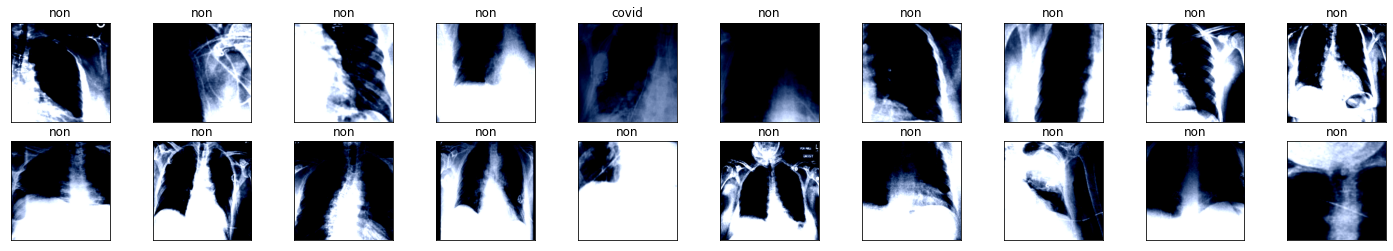

In [22]:
## Visualize The Data
dataiter=iter(train_loaders)
images,labels=dataiter.next()
images=images.numpy()
images=np.clip(images,0,1)

fig=plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    plt.imshow(np.transpose(images[idx],(1,2,0)))
    ax.set_title(classes[labels[idx]])

In [23]:
def train_model(model,criterion,optimozer,scheduler,batch_size,num_epochs=20):
    since=time.time()
    
    best_model_wts=copy.deepcopy(model.state_dict())
    best_acc=0.0
    train_acc = list()
    valid_acc = list()

In [24]:
resnet18=models.resnet18(pretrained=True)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### **Number Of In_features And Out_features**

In [25]:
print(resnet18.fc.in_features)
print(resnet18.fc.out_features)

512
1000


#### **Freezing**

In [26]:
for param in resnet18.parameters():
    param.requires_grad=False

In [27]:
num_features=resnet18.fc.in_features
resnet18.fc=nn.Linear(num_features,len(classes))
print(resnet18.fc.out_features)

2


In [28]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(resnet18.fc.parameters(),lr=0.0001)

In [29]:
n_epochs=10
for epoch in range(1,n_epochs+1):
    train_loss=0.0
    ###Model_Training##
    for batch_i,(data,target) in enumerate(train_loaders):
        optimizer.zero_grad()
        output=resnet18(data)
        loss=criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
        if batch_i % 20 ==19:
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss=0.0

Epoch 1, Batch 20 loss: 0.3485161662101746
Epoch 1, Batch 40 loss: 0.2916362971067429
Epoch 1, Batch 60 loss: 0.2661174967885017
Epoch 1, Batch 80 loss: 0.2605852857232094
Epoch 1, Batch 100 loss: 0.2080184735357761
Epoch 2, Batch 20 loss: 0.2008499581366777
Epoch 2, Batch 40 loss: 0.2120155859738588
Epoch 2, Batch 60 loss: 0.1975524127483368
Epoch 2, Batch 80 loss: 0.1825356833636761
Epoch 2, Batch 100 loss: 0.1760200254619121
Epoch 3, Batch 20 loss: 0.1784868497401476
Epoch 3, Batch 40 loss: 0.1871870815753937
Epoch 3, Batch 60 loss: 0.1719784401357174
Epoch 3, Batch 80 loss: 0.1286039654165506
Epoch 3, Batch 100 loss: 0.2034507673233747
Epoch 4, Batch 20 loss: 0.1585722319781780
Epoch 4, Batch 40 loss: 0.1824707491323352
Epoch 4, Batch 60 loss: 0.1329953595995903
Epoch 4, Batch 80 loss: 0.1733330249786377
Epoch 4, Batch 100 loss: 0.1905828675255180
Epoch 5, Batch 20 loss: 0.2127637667581439
Epoch 5, Batch 40 loss: 0.1723740650340915
Epoch 5, Batch 60 loss: 0.1587397091090679
Epoch 5

In [33]:
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

resnet18.eval() # eval mode

# iterate over test data
for data, target in test_loaders:
    # move tensors to GPU if CUDA is available
    
    output = resnet18(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct =  np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loaders.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.136398

Test Accuracy of covid:  0% ( 0/100)
Test Accuracy of   non: 100% (3000/3000)

Test Accuracy (Overall): 96% (3000/3100)


<ipython-input-34-3cd5d472bac2>:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats

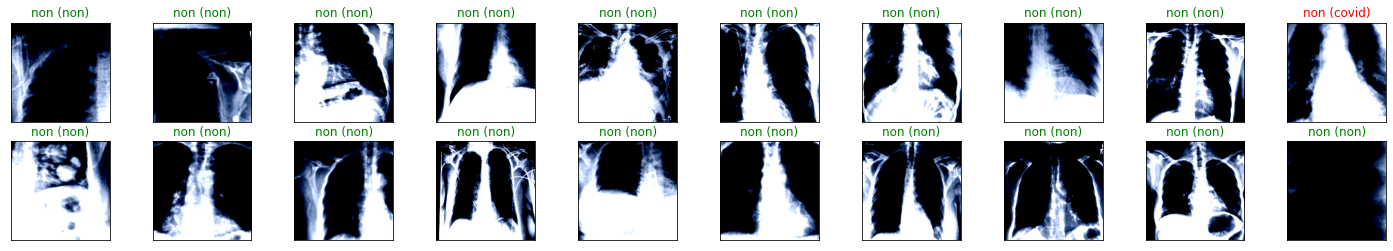

In [34]:
# obtain one batch of test images
dataiter = iter(test_loaders)
images, labels = dataiter.next()
images.numpy()


# get sample outputs
output = resnet18(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [35]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [36]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}

In [38]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size= batch_size,
                                             shuffle=True, num_workers=num_workers)
              for x in ['train', 'test']}

In [39]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes  ## 0: child, and 1: nonchild


In [49]:
def train_model(model, criterion, optimizer, scheduler, batch_szie, num_epochs= 20):
    since = time.time()
    
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_acc= list()
    valid_acc= list()

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            running_prec= 0.0
            running_rec = 0.0
            running_f1  = 0.0

            # Iterate over data.
            cur_batch_ind= 0
            for inputs, labels in dataloaders[phase]:
                #print(cur_batch_ind,"batch inputs shape:", inputs.shape)
                #print(cur_batch_ind,"batch label shape:", labels.shape)
                #inputs = inputs.to(device)
                #labels = labels.to(device)
                

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                cur_acc= torch.sum(preds == labels.data).double()/batch_szie
                cur_batch_ind +=1
                print("\npreds:", preds)
                print("label:", labels.data)
                print("%d-th epoch, %d-th batch (size=%d), %s acc= %.3f \n" %(epoch+1, cur_batch_ind, len(labels), phase, cur_acc ))
                
                if phase=='train':
                    train_acc.append(cur_acc)
                else:
                    valid_acc.append(cur_acc)
                
            epoch_loss= running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f} \n\n'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                #best_epoch= epoch
                best_model_wts = copy.deepcopy(model.state_dict())



    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc= %.3f at Epoch: %d' %(best_acc) )

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_acc, valid_acc


In [50]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default   
num_ftrs = model_conv.fc.in_features        
model_conv.fc = nn.Linear(num_ftrs, 2)


#model_conv = model_conv.to(device)  
criterion = nn.CrossEntropyLoss()


In [51]:
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.0001)  


In [52]:
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv, train_acc, valid_acc = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, 20, num_epochs= 100)
model_conv.eval()
torch.save(model_conv, './covid_resnet18_epoch%d.pt' %100 )


end_time=time.time()
print("total_time tranfer learning=", end_time - start_time)

Epoch 1/100
----------

preds: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])
label: tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
1-th epoch, 1-th batch (size=20), train acc= 0.900 


preds: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
label: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
1-th epoch, 2-th batch (size=20), train acc= 1.000 


preds: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
label: tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
1-th epoch, 3-th batch (size=20), train acc= 0.950 


preds: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])
label: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
1-th epoch, 4-th batch (size=20), train acc= 0.950 


preds: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
label: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
